In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
pd.options.display.max_columns=1000
pd.set_option('display.max_colwidth', -1)
sys.path.insert(0, "C:\\Users\\vberlia\\Documents\\machine_learning")

In [2]:
from machineLearning.dataSummary import DataSummary
from machineLearning.visualizations import Visualization
from machineLearning.missingValues import MissingValue
from machineLearning.models import Model
from machineLearning.modelInputs import KNNInputs
from machineLearning.pipelines import Pipelines
from machineLearning.featureCreation import CreateMeanLookupFeature
from machineLearning.featureCreation import CreateMedianLookupFeature
from machineLearning.featureCreation import CreateFrequencyLookupFeature
from machineLearning.featureCreation import CreateOneHotEncoding
from machineLearning.featureCreation import CustomCutter
from machineLearning.misc import Misc
from machineLearning.missingValues import CustomEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import ggplot
from ggplot import *
import numpy as np

C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\vberlia\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
application_train=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_train.csv")
# application_newData=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/application_test.csv")
# bureau=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau.csv")
# bureau_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/bureau_balance.csv")
# # credit_card_balance=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/credit_card_balance.csv")
home_credit_col_desc=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/HomeCredit_columns_description.csv",encoding = "ISO-8859-1")
# intall_payment=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/installments_payments.csv")
# pos_cash=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/POS_CASH_balance.csv")
# prev_app=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/previous_application.csv")
# sample_submi=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/sample_submission.csv")

### Data Insights- Gathering maximum knowledge about the data
1. Total number of training rows 307511
2. Annuity amount is highly skewed data
3. Annuity amount with class '1' does not contains any missing data but class '0' contains 12 missing values
4. Its highly unbalanced classification problem-> around 92% people did not have payment difficulties
and only 8% had late payment issues.
5. Need to find the characteristics which actually separates them.
6. Bureau data frame contains the information about the previous loan history of people who applied for loan
from different financial institition. Lot of features can be generated from this.
7.

In [4]:
home_credit_col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [5]:
approved_sk_ids=application_train[application_train['TARGET']==1]['SK_ID_CURR']
rejected_sk_ids=application_train[application_train['TARGET']==0]['SK_ID_CURR']
# len(rejected_sk_ids)
set(rejected_sk_ids) & set(bureau['SK_ID_CURR'])
# set(application_train['SK_ID_CURR'])-set(bureau['SK_ID_CURR'])

NameError: name 'bureau' is not defined

### Preparing Features

### Since whole data is not able to fit in memory, working on sample data

In [5]:
app_sum=DataSummary.returnSummaryDataFrame(application_train)

In [93]:
DataSummary.returnFrequencyCounts(columns=['class'],data=X_train_prepared,normalize=True)

{'class':    class     count
 0  0      0.920444
 1  1      0.079556}

In [ ]:
# in the gender column

In [4]:
train_sample=application_train.sample(10000)

In [5]:
X=train_sample.values
Y=train_sample['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

In [6]:
X_train=pd.DataFrame(X_train)
X_train.columns=train_sample.columns
X_test=pd.DataFrame(X_test)
X_test.columns=train_sample.columns

In [7]:
freq_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN']
one_hot_columns=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN_freq_binned']

# This bins and the corresponding labels you will have to create manually after observing the range of the 
# numeric values, so that the bins covers all the values.
bin_columns={'CNT_CHILDREN_freq':[[0, 100, 1500,4000,6500],['high_num_child', 'medium_num_child', 'low_num_child','no_child']]}

global has_fitted_the_main_pipelines
has_fitted_the_main_pipelines=0
def create_all_features(freq_columns):
    # all_pipes will contain pipeline of different feature categories
    all_pipes=[]

    # Creating freqeuncy feature pipelines
    freq_pipes=[]
    for col in freq_columns:
        freq_pipes.append(('freq_by_'+col,CreateFrequencyLookupFeature(categorical_column=col,new_col_name=
                                         col+'_freq')))

    # Creating binning features
    bin_pipes=[]
    for col in bin_columns.keys():
        bin_pipes.append(('binned_'+col,CustomCutter(col=col,bins=bin_columns[col][0],labels=bin_columns[col][1])))

    # Creating one-hot feature pipelines
    one_hot_pipes=[]
    for col in one_hot_columns:
            one_hot_pipes.append(('one_hot_'+col,CreateOneHotEncoding(categorical_column=col)))

    # Create high level pipeline for all feature categories         
    all_pipes.append(Pipeline(freq_pipes))
    all_pipes.append(Pipeline(bin_pipes))
    all_pipes.append(Pipeline(one_hot_pipes))
    
    all_pipelines=[]
    count=1
    for pipe in all_pipes:
        all_pipelines.append(('feature_set'+str(count),pipe))
        count+=1

    return Pipeline(all_pipelines)   
final_pipeline=create_all_features(freq_columns)

In [8]:
"""
Creating adhoc features
"""

# Checking the counts of contract type across loan issues class(0,1)
contract_type_vs_loan_issues = pd.crosstab(index=X_train["NAME_CONTRACT_TYPE"], 
                           columns=X_train["TARGET"])

total_no_loan_issues=np.sum(contract_type_vs_loan_issues[0])
total_loan_issues=np.sum(contract_type_vs_loan_issues[1])
# Creating the lookup for prevalance of cash loans and revolving loans across loan issues and no loan issues

tmp=pd.DataFrame(contract_type_vs_loan_issues[0]).transpose().to_dict()

prev_no_loan_issues={}
for key in tmp.keys():
    prev_no_loan_issues[key]=np.round(tmp[key][0]/total_no_loan_issues,3)

tmp=pd.DataFrame(contract_type_vs_loan_issues[1]).transpose().to_dict()
prev_loan_issues={}
for key in tmp.keys():
    prev_loan_issues[key]=np.round(tmp[key][1]/total_loan_issues,3)    

# Final feature set columns    
columns=['prev_no_loan_issue','prev_loan_issue','NAME_CONTRACT_TYPE_freq','name_contract_type_cash_loans', 'name_contract_type_revolving_loans']

In [9]:
# Data Preparer function -> should prepare data for all train, test and new data. Because
# every data kind(train, test and new data) goes through the same preparation 
# phase
def dataPreparer(data,columns,has_fitted_the_main_pipelines,final_pipeline):
    newData=data.copy()
    colsA=newData.columns

    # It is observed that there are few vals with 'XNA' code and replacing them with 'F'
    newData=MissingValue.replaceValuesInColumns(columns=['CODE_GENDER'],data=newData,replace_with_val='F',val_to_replace='XNA')
    
    # Adding two new features
    newData['prev_no_loan_issue']=newData['NAME_CONTRACT_TYPE'].map(lambda x: prev_no_loan_issues[x])
    newData['prev_loan_issue']=newData['NAME_CONTRACT_TYPE'].map(lambda x: prev_loan_issues[x])

    if has_fitted_the_main_pipelines==0:
        final_pipeline=final_pipeline.fit(newData)
        has_fitted_the_main_pipelines=1
    newData=final_pipeline.transform(newData)
    colsB=newData.columns
    columns=list(colsB[len(colsA):len(colsB)])    
    columns.append('CNT_CHILDREN')
    columns.append('TARGET')
    return newData[columns],has_fitted_the_main_pipelines

In [25]:
X_train.head(4)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,451038,0,Cash loans,F,N,Y,0,135000,545040,25407,450000,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.004849,-10035,-3029,-10035,-2280,NaN,1,1,0,1,1,0,Cleaning staff,2,2,2,TUESDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.638994,0.105507,0.375711,0.0619,0.0629,0.9762,0.6736,0.0052,0,0.1034,0.1667,0.0417,0.0429,0.0504,0.0337,0,NaN,0.063,0.0653,0.9762,0.6864,0.0053,0,0.1034,0.1667,0.0417,0.0439,0.0551,0.0351,0,NaN,0.0625,0.0629,0.9762,0.678,0.0053,0,0.1034,0.1667,0.0417,0.0437,0.0513,0.0343,0,NaN,reg oper account,block of flats,0.0395,"Stone, brick",No,0,0,0,0,-749,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,420650,1,Cash loans,F,N,Y,0,135000,735804,26559,607500,Family,State servant,Secondary / secondary special,Separated,Office apartment,0.00733,-19278,-1338,-4253,-2780,NaN,1,1,0,1,0,0,Medicine staff,1,2,2,TUESDAY,10,0,0,0,0,1,1,Medicine,0.544123,0.529859,0.365617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,-1998,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,442398,0,Cash loans,F,N,N,0,112500,180000,14431.5,180000,Unaccompanied,State servant,Incomplete higher,Single / not married,House / apartment,0.01885,-8496,-418,-6453,-1143,NaN,1,1,1,1,0,0,Core staff,1,2,2,FRIDAY,13,1,1,0,1,1,0,Kindergarten,0.186123,0.671493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,-305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,170940,0,Cash loans,M,Y,Y,0,225000,508496,24462,454500,Unaccompanied,Working,Secondary / secondary

In [10]:
'''
This should be underlying order
'''
X_train_prepared,has_fitted_the_main_pipelines=dataPreparer(X_train,columns,has_fitted_the_main_pipelines,final_pipeline)
# X_test_prepared,has_fitted_the_main_pipelines=dataPreparer(X_test,columns,has_fitted_the_main_pipelines,final_pipeline)
# new_data_prepared,has_fitted_the_main_pipelines=dataPreparer(new_data,columns,has_fitted_the_main_pipelines,final_pipeline)

In [11]:
# np.unique(X_train_prepared['TARGET'],return_counts=True)
Misc.rename_columns(columns={'TARGET':'class'},data=X_train_prepared)
X_train_prepared=Misc.drop_columns(data=X_train_prepared,columns=['CNT_CHILDREN_freq_binned'])

In [12]:
X_train_prepared.dtypes

prev_no_loan_issue                           float64
prev_loan_issue                              float64
NAME_CONTRACT_TYPE_freq                      int64  
CODE_GENDER_freq                             int64  
FLAG_OWN_CAR_freq                            int64  
FLAG_OWN_REALTY_freq                         int64  
CNT_CHILDREN_freq                            int64  
name_contract_type_cash_loans                int32  
name_contract_type_revolving_loans           int32  
code_gender_f                                int32  
code_gender_m                                int32  
flag_own_car_n                               int32  
flag_own_car_y                               int32  
flag_own_realty_n                            int32  
flag_own_realty_y                            int32  
cnt_children_freq_binned_high_num_child      int32  
cnt_children_freq_binned_low_num_child       int32  
cnt_children_freq_binned_medium_num_child    int32  
cnt_children_freq_binned_no_child            i

In [77]:
X_train_prepared.head(3)

,prev_no_loan_issue,prev_loan_issue,NAME_CONTRACT_TYPE_freq,CODE_GENDER_freq,FLAG_OWN_CAR_freq,FLAG_OWN_REALTY_freq,CNT_CHILDREN_freq,name_contract_type_cash_loans,name_contract_type_revolving_loans,code_gender_f,code_gender_m,flag_own_car_n,flag_own_car_y,flag_own_realty_n,flag_own_realty_y,cnt_children_freq_binned_high_num_child,cnt_children_freq_binned_low_num_child,cnt_children_freq_binned_medium_num_child,cnt_children_freq_binned_no_child,CNT_CHILDREN,class
0,0.906,0.922,8168,5974,5930,6155,6334,1,0,1,0,1,0,0,1,0,0,0,1,0,0
1,0.906,0.922,8168,5974,5930,6155,6334,1,0,1,0,1,0,0,1,0,0,0,1,0,1
2,0.906,0.922,8168,5974,5930,2845,6334,1,0,1,0,1,0,1,0,0,0,0,1,0,0


In [70]:
X_train_prepared.head(3)

,prev_no_loan_issue,prev_loan_issue,NAME_CONTRACT_TYPE_freq,CODE_GENDER_freq,FLAG_OWN_CAR_freq,FLAG_OWN_REALTY_freq,CNT_CHILDREN_freq,CNT_CHILDREN_freq_binned,name_contract_type_cash_loans,name_contract_type_revolving_loans,code_gender_f,code_gender_m,flag_own_car_n,flag_own_car_y,flag_own_realty_n,flag_own_realty_y,cnt_children_freq_binned_high_num_child,cnt_children_freq_binned_low_num_child,cnt_children_freq_binned_medium_num_child,cnt_children_freq_binned_no_child,CNT_CHILDREN,TARGET
0,0.906,0.922,8168,5974,5930,6155,6334,no_child,1,0,1,0,1,0,0,1,0,0,0,1,0,0
1,0.906,0.922,8168,5974,5930,6155,6334,no_child,1,0,1,0,1,0,0,1,0,0,0,1,0,1
2,0.906,0.922,8168,5974,5930,2845,6334,no_child,1,0,1,0,1,0,1,0,0,0,0,1,0,0


In [57]:
X_test_prepared.head(3)

,prev_no_loan_issue,prev_loan_issue,NAME_CONTRACT_TYPE_freq,CODE_GENDER_freq,FLAG_OWN_CAR_freq,FLAG_OWN_REALTY_freq,CNT_CHILDREN_freq,CNT_CHILDREN_freq_binned,name_contract_type_cash_loans,name_contract_type_revolving_loans,code_gender_f,code_gender_m,flag_own_car_n,flag_own_car_y,flag_own_realty_n,flag_own_realty_y,cnt_children_freq_binned_high_num_child,cnt_children_freq_binned_low_num_child,cnt_children_freq_binned_medium_num_child,cnt_children_freq_binned_no_child,CNT_CHILDREN
0,0.906,0.922,8168,5974,3070,6155,1757,low_num_child,1,0,1,0,0,1,0,1,0,1,0,0,1
1,0.906,0.922,8168,5974,5930,2845,6334,no_child,1,0,1,0,1,0,1,0,0,0,0,1,0
2,0.906,0.922,8168,3026,3070,2845,1757,low_num_child,1,0,0,1,0,1,1,0,0,1,0,0,1


In [ ]:
X_test_prepared.head(100)

In [ ]:
Pipelines.pipelines

In [67]:
X_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,451038,0,Cash loans,F,N,Y,0,135000,545040,25407,450000,Unaccompanied,Working,Secondary / secondary special,Married,With parents,0.004849,-10035,-3029,-10035,-2280,NaN,1,1,0,1,1,0,Cleaning staff,2,2,2,TUESDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.638994,0.105507,0.375711,0.0619,0.0629,0.9762,0.6736,0.0052,0,0.1034,0.1667,0.0417,0.0429,0.0504,0.0337,0,NaN,0.063,0.0653,0.9762,0.6864,0.0053,0,0.1034,0.1667,0.0417,0.0439,0.0551,0.0351,0,NaN,0.0625,0.0629,0.9762,0.678,0.0053,0,0.1034,0.1667,0.0417,0.0437,0.0513,0.0343,0,NaN,reg oper account,block of flats,0.0395,"Stone, brick",No,0,0,0,0,-749,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,420650,1,Cash loans,F,N,Y,0,135000,735804,26559,607500,Family,State servant,Secondary / secondary special,Separated,Office apartment,0.00733,-19278,-1338,-4253,-2780,NaN,1,1,0,1,0,0,Medicine staff,1,2,2,TUESDAY,10,0,0,0,0,1,1,Medicine,0.544123,0.529859,0.365617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,-1998,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,442398,0,Cash loans,F,N,N,0,112500,180000,14431.5,180000,Unaccompanied,State servant,Incomplete higher,Single / not married,House / apartment,0.01885,-8496,-418,-6453,-1143,NaN,1,1,1,1,0,0,Core staff,1,2,2,FRIDAY,13,1,1,0,1,1,0,Kindergarten,0.186123,0.671493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,-305,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
set(X_train_prepared['class'])

{0, 1}

In [13]:
X_train_prepared['class'] = X_train_prepared['class'].astype('int32')
X_train_prepared['CNT_CHILDREN'] = X_train_prepared['CNT_CHILDREN'].astype('int32')

In [14]:
X_train_prepared.dtypes

prev_no_loan_issue                           float64
prev_loan_issue                              float64
NAME_CONTRACT_TYPE_freq                      int64  
CODE_GENDER_freq                             int64  
FLAG_OWN_CAR_freq                            int64  
FLAG_OWN_REALTY_freq                         int64  
CNT_CHILDREN_freq                            int64  
name_contract_type_cash_loans                int32  
name_contract_type_revolving_loans           int32  
code_gender_f                                int32  
code_gender_m                                int32  
flag_own_car_n                               int32  
flag_own_car_y                               int32  
flag_own_realty_n                            int32  
flag_own_realty_y                            int32  
cnt_children_freq_binned_high_num_child      int32  
cnt_children_freq_binned_low_num_child       int32  
cnt_children_freq_binned_medium_num_child    int32  
cnt_children_freq_binned_no_child            i

In [15]:
result=Model.fit_knn_pipelines(X_train_prepared,Pipelines.pipelines,5)

KeyError: 'n_neighbors'

In [94]:
DataSummary.returnFrequencyCounts(columns=['class'],data=X_train_prepared,normalize=True)

{'class':    class     count
 0  0      0.920444
 1  1      0.079556}

In [96]:
result

,best_k,knn_accuracy,pipeline,pipeline_cleaned
KNN,{'classify__n_neighbors': 8},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> KNN
KNN,{'classify__n_neighbors': 8},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> KNN
KNN,{'classify__n_neighbors': 8},0.920444,"Pipeline(memory=None,\n steps=[('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data-> complete_case-> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> z_score_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_median -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('standardize', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> complete_case -> min_max_normalize -> KNN
KNN,{'classify__n_neighbors': 2},0.920444,"Pipeline(memory=None,\n steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('normalize', Normalizer(copy=True, norm='l2')), ('classify', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=1, n_neighbors=5, p=2,\n weights='uniform'))])",Data -> impute_mean -> row_normalize -> KNN


In [94]:
final_pipeline.__dict__['steps'][0][1].__dict__['steps'][0][1].__dict__

{'categorical_column': 'NAME_CONTRACT_TYPE',
 'lookup': None,
 'new_col_name': 'NAME_CONTRACT_TYPE_freq',
 'train_data': None,
 'val_for_unseen_category': 999}

In [71]:
pd.DataFrame(list(np.unique(X_train['NAME_CONTRACT_TYPE'],return_counts=True)))

,0,1
0,Cash loans,Revolving loans
1,8179,821


In [83]:
X_train['TARGET'] = X_train.TARGET.astype(float)

In [86]:
dict(X_train.groupby(['NAME_CONTRACT_TYPE'])['NAME_CONTRACT_TYPE'].count())

{'Cash loans': 8179, 'Revolving loans': 821}

In [ ]:
X_train.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].agg(['mean'])

In [107]:
keys=list(set(X_train['NAME_CONTRACT_TYPE']))

In [108]:
dictionary = dict(zip(keys, values))

In [105]:
values=list(range(0,len(a)))

In [112]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [177]:
cc=CreateOneHotEncoding(categorical_column='NAME_CONTRACT_TYPE')

In [174]:
['NAME_CONTRACT_TYPE'.lower()+'_'+item.lower().replace(" ","_") for  item in list(cc.mlb.classes_)]

['name_contract_type_cash_loans', 'name_contract_type_revolving_loans']

In [173]:
'NAME_CONTRACT_TYPE'.lower()+'_'

'name_contract_type'

In [157]:
X_train_prepared.head(2).join(cc.transform(X_train).head(2))

,prev_no_loan_issue,prev_loan_issue,NAME_CONTRACT_TYPE_freq,Cash loans,Revolving loans
0,0.903,0.944,8157,1,0
1,0.903,0.944,8157,1,0


In [178]:
cc.fit(X_train)

In [180]:
cc.transform(X_train_prepared)

KeyError: 'NAME_CONTRACT_TYPE'

In [131]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

pd.DataFrame(mlb.fit_transform(X_train['NAME_CONTRACT_TYPE'].map(lambda x:[x])),columns=mlb.classes_)

,Cash loans,Revolving loans
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [127]:
X_train['NAME_CONTRACT_TYPE'].head()

0    Cash loans     
1    Cash loans     
2    Cash loans     
3    Revolving loans
4    Cash loans     
Name: NAME_CONTRACT_TYPE, dtype: object

In [128]:
X_train['NAME_CONTRACT_TYPE'].map(lambda x:[x])

0       [Cash loans]     
1       [Cash loans]     
2       [Cash loans]     
3       [Revolving loans]
4       [Cash loans]     
5       [Cash loans]     
6       [Cash loans]     
7       [Cash loans]     
8       [Cash loans]     
9       [Cash loans]     
10      [Cash loans]     
11      [Cash loans]     
12      [Cash loans]     
13      [Cash loans]     
14      [Cash loans]     
15      [Cash loans]     
16      [Cash loans]     
17      [Cash loans]     
18      [Cash loans]     
19      [Cash loans]     
20      [Cash loans]     
21      [Cash loans]     
22      [Cash loans]     
23      [Cash loans]     
24      [Cash loans]     
25      [Cash loans]     
26      [Cash loans]     
27      [Cash loans]     
28      [Revolving loans]
29      [Cash loans]     
            ...          
8970    [Revolving loans]
8971    [Cash loans]     
8972    [Cash loans]     
8973    [Cash loans]     
8974    [Cash loans]     
8975    [Cash loans]     
8976    [Cash loans]     
8977    [Cas

In [116]:
ohe.fit_transform(a).values.reshape(-1,1)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [113]:
a=X_train['NAME_CONTRACT_TYPE'].map(lambda x:dictionary[x]).head()

In [96]:
pd.get_dummies(X_train['NAME_CONTRACT_TYPE'])

,Cash loans,Revolving loans
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [ ]:
DataSummary.returnFrequencyCounts(columns=['TARGET','NAME_CONTRACT_TYPE'],data=X_train)

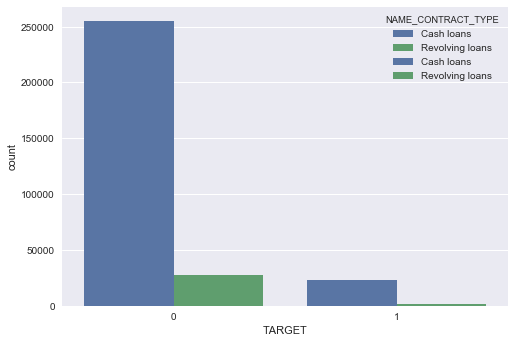

In [20]:
sns.countplot(x="TARGET", hue="NAME_CONTRACT_TYPE", data=application_train)
plt.show()

In [6]:
app_train_sum=DataSummary.returnSummaryDataFrame(application_train)

In [17]:
import seaborn as sns
sns.categorical(x="TARGET", y="AMT_ANNUITY", kind="box", data=application_train);

TypeError: 'module' object is not callable

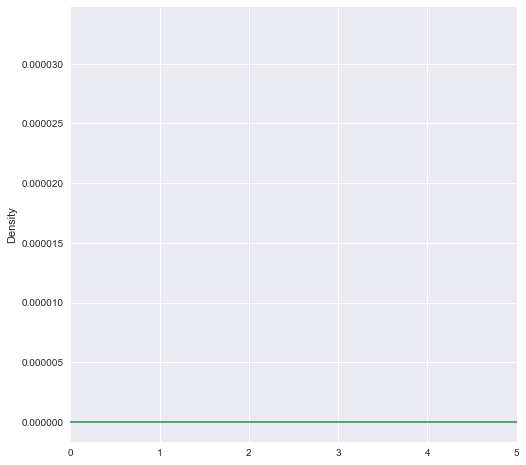

In [14]:
application_train["AMT_ANNUITY"].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,5))
plt.show()

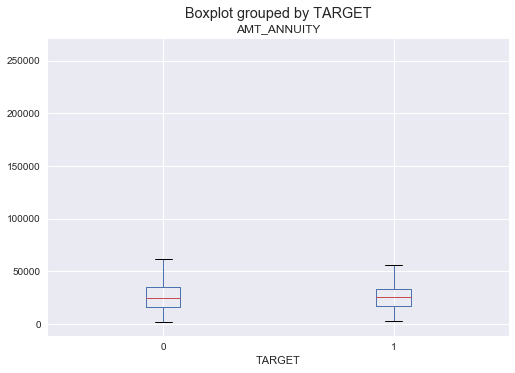

In [12]:
application_train.boxplot(column="AMT_ANNUITY", by= "TARGET")
plt.show()

In [7]:
app_train_sum['NAME_CONTRACT_TYPE']

col_type         object                          
count_unique     2                               
unique_values    ['Cash loans' 'Revolving loans']
missing_count    0                               
count            NaN                             
mean             NaN                             
std              NaN                             
min              NaN                             
25%              NaN                             
50%(median)      NaN                             
75%              NaN                             
max              NaN                             
mode             Cash loans                      
Name: NAME_CONTRACT_TYPE, dtype: object

In [49]:
np.nanmedian(application_train[application_train['TARGET'] == 0][['AMT_ANNUITY']])

24876.0

In [54]:
annuity_median_class_0=np.nanmedian(application_train[application_train['TARGET'] == 0][['AMT_ANNUITY']])
annuity_mean_class_0=np.nanmean(application_train[application_train['TARGET'] == 0][['AMT_ANNUITY']])
tmp=MissingValue.replaceValuesInColumns(data=application_train, val_to_replace=None, replace_with_val=annuity_median_class_0, columns=['AMT_ANNUITY'])

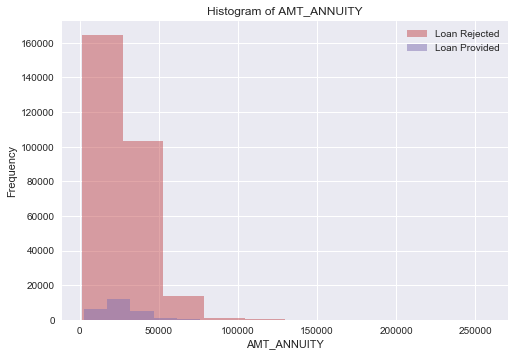

In [56]:
Visualization.createHistPlotForVarsForBinaryClass(data=tmp, label_column='TARGET', columns=['AMT_ANNUITY'], zero_meaning='Loan Rejected', one_meaning='Loan Approved')

In [12]:
home_credit_col_desc=pd.read_csv("C:/Users/vberlia/Documents/data/credit_prediction/all/HomeCredit_columns_description.csv",encoding = "ISO-8859-1")

In [13]:
home_credit_col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
DataSummary.returnSummaryDataFrame()